In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'plot_correction_percentage',
        root = '..',
        default_wildcards={'sample': 'WTC11'}
    )

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
uncorrected = dict()
corrected = dict()

for i in snakemake.input['uncorrected']:
    _, protocal, platform, _, _ = Path(i).stem.split('_')   
    uncorrected[f'{protocal} {platform}'] = pd.read_csv(i)
    
for i in snakemake.input['corrected']:
    _, protocal, platform, _, _, _, _ = Path(i).stem.split('_') 
    corrected[f'{protocal} {platform}'] = pd.read_csv(i)

In [4]:
df = list()

for i in uncorrected:
    df_uncorr = uncorrected[i]
    df_corr = corrected[i]

    df.append({
        'Uncorrected': (df_uncorr['support'] == 'yes').sum() / df_uncorr.shape[0],
        'Corrected': (df_corr['support'] == 'yes').sum() / df_corr.shape[0],
        'Data Source': i
    })
    
df = pd.DataFrame(df)

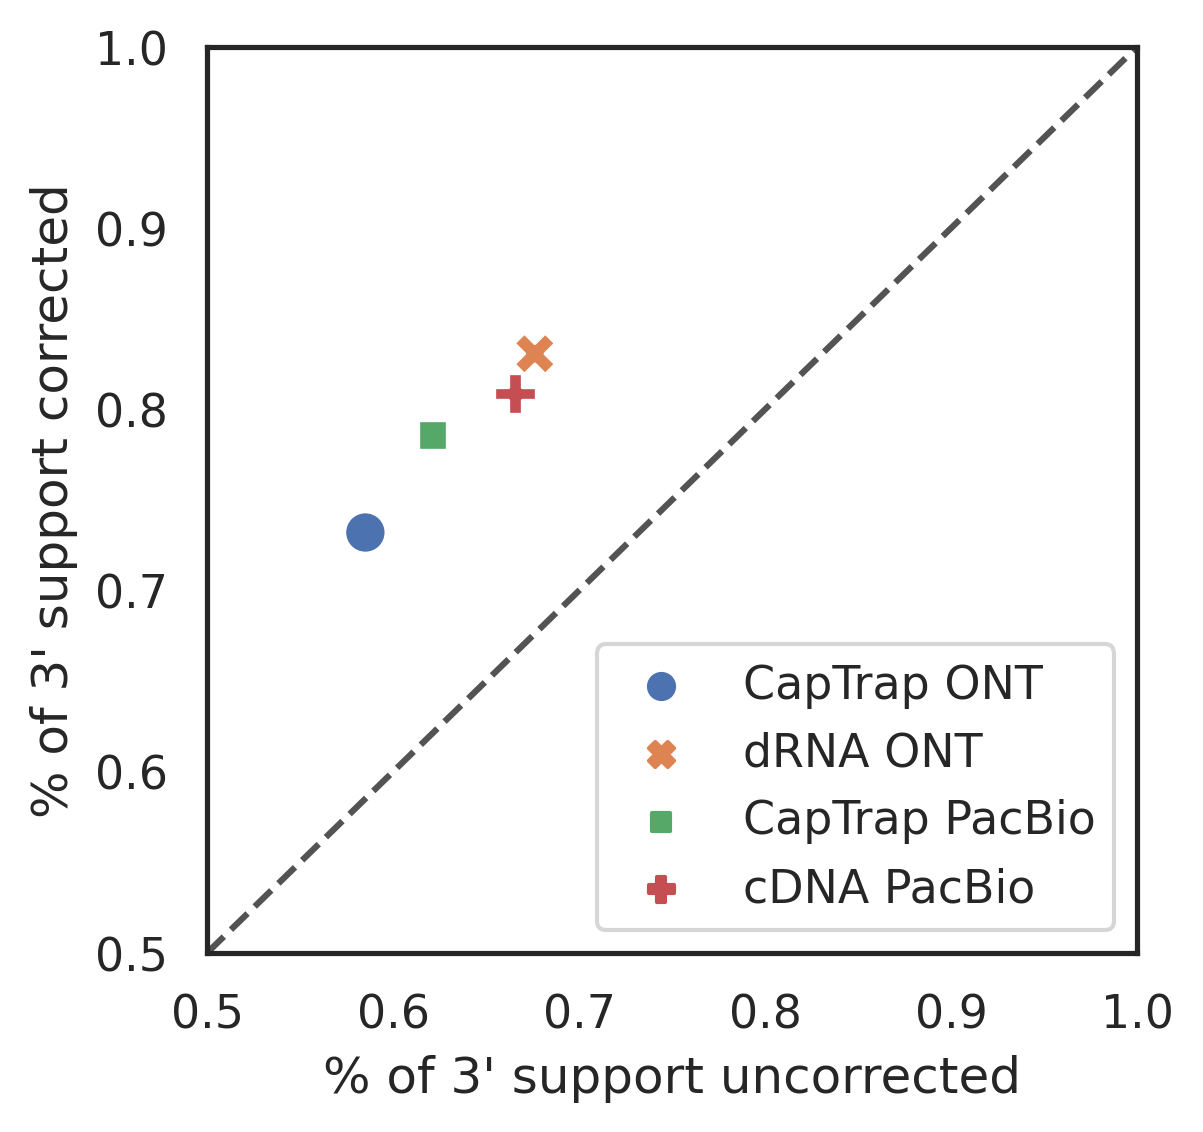

In [11]:
plt.figure(figsize=(4, 4), dpi=300)
sns.set_theme(style="white")

ax = sns.scatterplot(data=df, x='Uncorrected', y='Corrected', hue='Data Source', style='Data Source', s=100)

lim = (0.5, 1)
ax.plot(lim, lim, 'k--', alpha=0.75, zorder=0)
plt.xlim(lim)
plt.ylim(lim)
plt.legend(loc='lower right')
plt.xlabel("% of 3' support uncorrected")
plt.ylabel("% of 3' support corrected")
plt.savefig(snakemake.output['fig'], bbox_inches = "tight")